# 라이브러리

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/bsh36/Desktop/Data/facebook/train.csv')
test = pd.read_csv('C:/Users/bsh36/Desktop/Data/facebook/test.csv')
sub = pd.read_csv('C:/Users/bsh36/Desktop/Data/facebook/sampleSubmission.csv')
bids = pd.read_csv('C:/Users/bsh36/Desktop/Data/facebook/bids.csv')

In [3]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [4]:
test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


* payment_account의 기록을 보면 앞의 6자리가 동일하다

In [5]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


# 전처리

In [6]:
# datetime의 날짜 형식을  datetime으로 변경
from datetime import datetime
bids['datetime'] = bids['time'].apply(lambda x : datetime.fromtimestamp(x/(3600*24*30)))
bids['year'] = bids['datetime'].dt.year
bids['month'] = bids['datetime'].dt.month
bids['day'] = bids['datetime'].dt.day
bids


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,datetime,year,month,day
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,2089-04-24 09:15:07.212475,2089,4,24
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,2089-04-24 09:15:07.212475,2089,4,24
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,2089-04-24 09:15:07.212475,2089,4,24
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,2089-04-24 09:15:07.212475,2089,4,24
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,2089-04-24 09:15:07.212475,2089,4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug,2088-09-13 00:37:21.293047,2088,9,13
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn,2088-09-13 00:37:21.293047,2088,9,13
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa,2088-09-13 00:37:21.293047,2088,9,13
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl,2088-09-13 00:37:21.293047,2088,9,13


In [7]:
date = bids.groupby('bidder_id')['year','month','day'].mean()
date

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,month,day
bidder_id,,,
001068c415025a009fee375a12cff4fcnht8y,2088.000000,8.000000,31.000000
002d229ffb247009810828f648afc2ef593rb,2089.000000,5.000000,27.000000
0030a2dd87ad2733e0873062e4f83954mkj86,2088.000000,8.000000,23.000000
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,2087.666667,9.000000,14.333333
00486a11dff552c4bd7696265724ff81yeo9v,2087.250000,9.800000,17.350000
...,...,...,...
ffbc0fdfbf19a8a9116b68714138f2902cc13,2089.000000,5.186680,15.083589
ffc4e2dd2cc08249f299cab46ecbfacfobmr3,2087.363636,9.772727,10.590909
ffd29eb307a4c54610dd2d3d212bf3bagmmpl,2087.000000,11.000000,19.000000


In [8]:
# id 별로 구매한 시간이 오래되면 사람일 가능성이 높고, 짧을 수록 로봇일 가능성이 높다.
time = bids.groupby('bidder_id')['time'].apply(lambda x: (x.max() - x.min())/x.count())
time

bidder_id
001068c415025a009fee375a12cff4fcnht8y    0.000000e+00
002d229ffb247009810828f648afc2ef593rb    5.263158e+07
0030a2dd87ad2733e0873062e4f83954mkj86    0.000000e+00
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    2.198523e+13
00486a11dff552c4bd7696265724ff81yeo9v    3.817492e+12
                                             ...     
ffbc0fdfbf19a8a9116b68714138f2902cc13    5.439912e+08
ffc4e2dd2cc08249f299cab46ecbfacfobmr3    3.432876e+12
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    0.000000e+00
ffd62646d600b759a985d45918bd6f0431vmz    2.051855e+10
fff2c070d8200e0a09150bd81452ce29ngcnv    0.000000e+00
Name: time, Length: 6614, dtype: float64

In [10]:
# 구매기록이 많으면 로봇일 가능성이 높다. 
id_count = bids.groupby('bidder_id')['bid_id'].count()
id_count

bidder_id
001068c415025a009fee375a12cff4fcnht8y        1
002d229ffb247009810828f648afc2ef593rb        2
0030a2dd87ad2733e0873062e4f83954mkj86        1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o        3
00486a11dff552c4bd7696265724ff81yeo9v       20
                                         ...  
ffbc0fdfbf19a8a9116b68714138f2902cc13    25075
ffc4e2dd2cc08249f299cab46ecbfacfobmr3       22
ffd29eb307a4c54610dd2d3d212bf3bagmmpl        1
ffd62646d600b759a985d45918bd6f0431vmz      664
fff2c070d8200e0a09150bd81452ce29ngcnv        1
Name: bid_id, Length: 6614, dtype: int64

In [11]:
# auction country device의 수가 높으면 로봇일 가능성이 높다.
nunique = bids.groupby('bidder_id')['auction','country','device'].nunique()
nunique

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,auction,country,device
bidder_id,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1
002d229ffb247009810828f648afc2ef593rb,1,1,2
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,1,3
00486a11dff552c4bd7696265724ff81yeo9v,13,1,8
...,...,...,...
ffbc0fdfbf19a8a9116b68714138f2902cc13,637,102,792
ffc4e2dd2cc08249f299cab46ecbfacfobmr3,15,6,13
ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1


In [12]:
alldata = pd.concat([train, test])
alldata = pd.merge(alldata,id_count,on='bidder_id',how='left')
alldata = pd.merge(alldata,nunique,on='bidder_id',how='left')
alldata = pd.merge(alldata, time, on = 'bidder_id',how='left')
alldata = pd.merge(alldata, date, on='bidder_id',how='left')
alldata['payment_account'] = alldata['payment_account'].apply(lambda x :x[:5])
alldata['address'] = alldata['address'].apply(lambda x :x[:5])

c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='outcome', ylabel='time'>

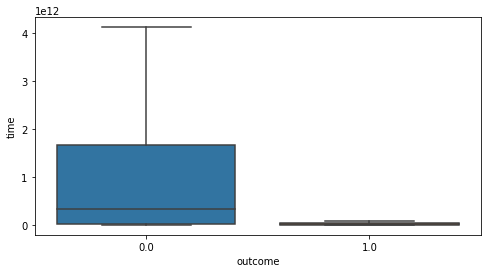

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.boxplot(alldata['outcome'],alldata['time'],showfliers=False)

* 구매하는 시간이 길수록 로봇이 아님을 보여줌

In [14]:
alldata['auction_ratio'] = alldata['bid_id']/alldata['auction']
alldata['device_ratio'] = alldata['bid_id']/alldata['device']

In [15]:
alldata2 = alldata.drop(columns = ['outcome','bidder_id'])

# 모델링

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in alldata2.columns[alldata2.dtypes==object]:
    alldata2[i]=le.fit_transform(alldata2[i])

In [17]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train2, train['outcome'],random_state=1, test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

In [20]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=100)

In [21]:
cbc.fit(train2,train['outcome'])

Learning rate set to 0.013889
0:	learn: 0.6648089	total: 156ms	remaining: 2m 36s
100:	learn: 0.1163309	total: 332ms	remaining: 2.95s
200:	learn: 0.0872202	total: 505ms	remaining: 2.01s
300:	learn: 0.0732857	total: 683ms	remaining: 1.58s
400:	learn: 0.0629345	total: 861ms	remaining: 1.29s
500:	learn: 0.0551976	total: 1.06s	remaining: 1.05s
600:	learn: 0.0487231	total: 1.24s	remaining: 822ms
700:	learn: 0.0437643	total: 1.41s	remaining: 602ms
800:	learn: 0.0392134	total: 1.59s	remaining: 396ms
900:	learn: 0.0349401	total: 1.77s	remaining: 194ms
999:	learn: 0.0315530	total: 1.94s	remaining: 0us


In [22]:
# 사람인지 로봇인지에 대한 확률값을 예측
result = cbc.predict_proba(test2)

In [23]:
sub['prediction'] = result[:,1]
sub.to_csv('C:/Users/bsh36/Desktop/Data/facebook/cbc.csv',index=False)